In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data_science_job.csv")
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [4]:
cols = [var for var in df.columns if df[var].isnull().mean() <0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [5]:
df[cols]
#  AFTER DOING THIS CHECK FOR THE LOSS OF DATA AFTER DOING THIS 
len(df[cols].dropna())/len(df)
#  according to this data set we will be left with around 89 percent of the dataset


0.8968577095730244

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

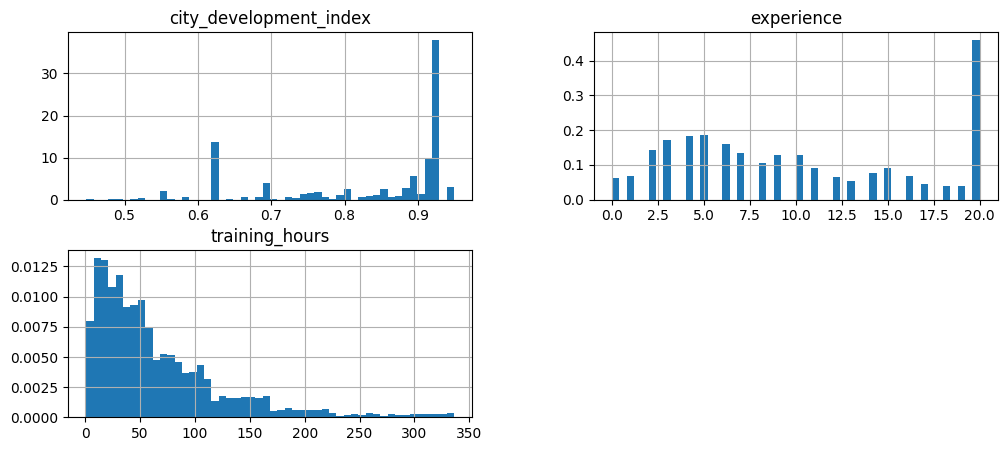

In [6]:
new_df = df[cols].dropna()
#  for each numerical colun 
new_df.hist(bins = 50 , density = True, figsize=(12,5))

<Axes: >

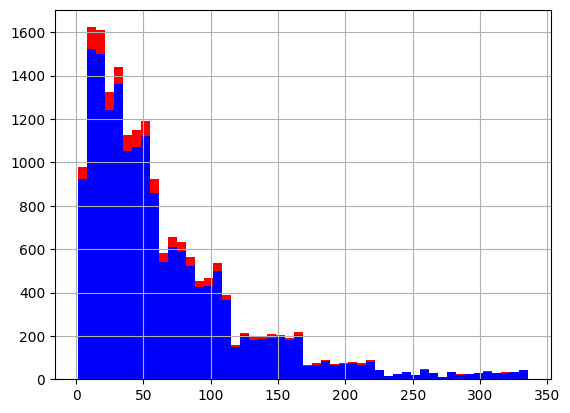

In [7]:
fig = plt.figure()
#  1 column 1 row and its first subplot
ax = fig.add_subplot(111)
df["training_hours"].hist(bins = 50 , ax=ax , color = "red")
new_df["training_hours"].hist(bins = 50 , ax=ax , color = "blue")

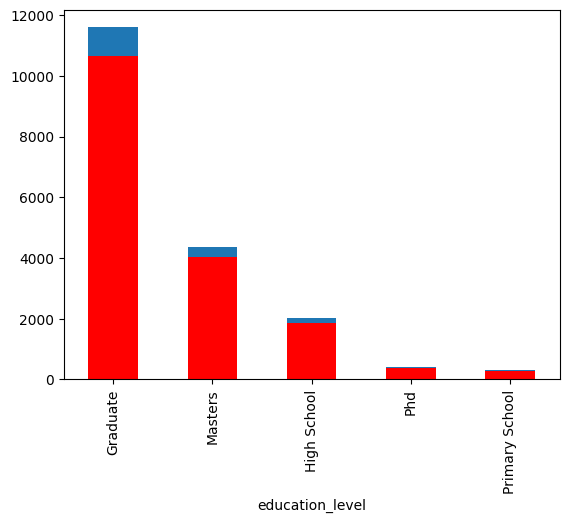

In [8]:
fig = plt.figure()
#  1 column 1 row and its first subplot
ax = fig.add_subplot(111)
a = df["education_level"].value_counts().plot(kind = "bar" ,ax=ax)
b = new_df["education_level"].value_counts().plot(kind = "bar" ,ax=ax , color = "red")


<H3>SIMPLE IMPUTATION</H3>

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer ,MissingIndicator
from sklearn.compose import ColumnTransformer

In [10]:
df = pd.read_csv("titanic_toy.csv")
x = df.drop(columns=["Survived"])
y = df["Survived"]

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=42)

In [12]:
x_train.shape,x_test.shape 

mean_age = x_train["Age"].mean()
midean_age = x_train["Age"].median()

mean_fare = x_train["Fare"].mean()
median_fare = x_train["Fare"].median()

# AGE FILLING
x_train["Age_mean"]  = x_train["Age"].fillna(mean_age)
x_train["Age_median"] = x_train["Age"].fillna(midean_age)
# FARE FILLING
x_train["Fare_mean"] = x_train["Fare"].fillna(mean_fare)
x_train["Fare_median"]= x_train["Fare"].fillna(median_fare)


In [13]:
x_train.isnull().mean()
x_test.isnull().mean()

Age       0.206704
Fare      0.050279
Family    0.000000
dtype: float64

In [14]:
# BY CHECKING THE VARIANCE WE ARE JUST CHECKING WHETHER THE VALUES HAVE DEVIATED MUCH THROUGH THE   
print("Original Age variance : " , x_train["Age"].var())
print("Age variance after mean imputation: " , x_train["Age_mean"].var())
print("Age variance after median imputation: " , x_train["Age_median"].var())

#  NOTE IF THE VALUES ARE DIFFERING TOO MUCH FROM THE ORIGINAL VARIANCE THEN THE SIMPLE IMPUTER METHOD CAN BE A RED FLAG 
print("Original Fare variance: " , x_train["Fare_mean"].var())
print("Fare Variance after mean imputation: ", x_train["Fare_mean"].var())
print("Fare Variance after median imputation: " , x_train["Fare_median"].var())


Original Age variance :  210.2517072477435
Age variance after mean imputation:  168.85193366872227
Age variance after median imputation:  169.20731007048155
Original Fare variance:  2621.232374951235
Fare Variance after mean imputation:  2621.232374951235
Fare Variance after median imputation:  2637.012481677765


In [15]:
x_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


'\nBY DOING THIS I CAME TO KNOW ABOUT THE OUTLIERS IN THE DATA AFTER IMPUTATION \nIT STARTS TO PUSH THE VALUES OUTER\n'

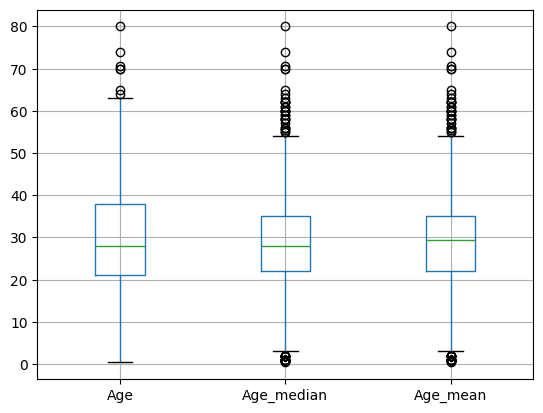

In [16]:
x_train[["Age" , "Age_median" , "Age_mean"]].boxplot()
#  IT WAS DONE TO UNDERSTAND THE EFFECT OF OUTLIERS

"""
BY DOING THIS I CAME TO KNOW ABOUT THE OUTLIERS IN THE DATA AFTER IMPUTATION 
IT STARTS TO PUSH THE VALUES OUTER
"""

<H3>ARBITRARY VALUE IMPUTATION</H3>

In [17]:
df = pd.read_csv("HOUSING.CSV" , usecols=["GarageQual" ,"FireplaceQu" , "SalePrice"])
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [18]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0.5, 1.0, 'GarageQual')

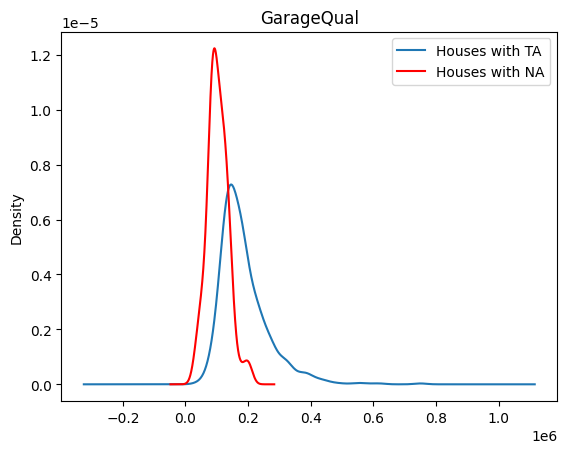

In [19]:
fig = plt.figure()
ax =fig.add_subplot(111)
df[df["GarageQual"]== "TA"]["SalePrice"].plot(kind="kde" , ax = ax)
df[df["GarageQual"].isnull()]["SalePrice"].plot(kind="kde" , ax = ax , color = "red") 
lines , labels = ax.get_legend_handles_labels()
labels = ["Houses with TA" , "Houses with NA"]
ax.legend(lines , labels , loc = "best")
plt.title("GarageQual")

In [20]:
temp = df[df["GarageQual"]== "TA"]["SalePrice"]
df["GarageQual"].fillna("TA" , inplace=True)

<H3>RANDOM IMPUTATION </H3>

In [21]:
df = pd.read_csv("train.csv" , usecols = ["Age" , "Fare" ,"Survived"])

In [22]:
x = df.drop(columns =["Survived"])
y = df["Survived"]

In [23]:
x_train , x_test , y_train ,y_test = train_test_split(x ,y , test_size=0.2 , random_state=8) 

In [24]:
x_train["Age_imputed"] = x_train["Age"]
x_test["Age_imputed"] = x_test["Age"]

In [25]:

x_train["Age_imputed"][x_train["Age_imputed"].isnull()] = x_train["Age"].dropna().sample(x_train["Age"].isnull().sum()).values
x_test["Age_imputed"][x_test["Age_imputed"].isnull()] = x_test["Age"].dropna().sample(x_test["Age"].isnull().sum()).values

In [26]:
x_train.tail()

,Age,Fare,Age_imputed
136,19.0,26.2833,19.0
133,29.0,26.0000,29.0
361,29.0,27.7208,29.0
340,2.0,26.0000,2.0
451,NaN,19.9667,2.0


In [27]:
x = df.drop(columns =["Survived"])
y = df["Survived"]

In [28]:
x_train , x_test , y_train ,y_test = train_test_split(x ,y , test_size=0.2 , random_state=8) 

In [29]:
SI = SimpleImputer()
x_train_trf = SI.fit_transform(x_train)
x_test_trf = SI.fit_transform(x_test)

In [30]:
#  just predicting through this transformation

from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(x_train_trf , y_train)
y_pred = clf.predict(x_test_trf)

# from sklearn.metrics import accuracy_score
# accuracy_score(y_test , y_pred)

In [31]:
mi = MissingIndicator()
mi.fit(x_train)


MissingIndicator()

In [32]:
mi.features_

array([0], dtype=int64)

In [33]:
x_train_missing = mi.transform(x_train)

In [34]:
x_train_missing

array([[ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

<H3>GRID SEARCH CV</H3>

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler


In [36]:
df = pd.read_csv("train.csv")
df.drop(columns=["PassengerId" , "Name" ,"Ticket" ,"Cabin"] ,inplace = True)

In [37]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [38]:
#  APPLYING A BIT OF PRPROCESSING

numerical_feature = ["Age" , "Fare"]
numerical_transformer = Pipeline(steps = [
 ("imputer" , SimpleImputer(strategy="median")),
 ("scaler" , StandardScaler())
])

categorical_feature = ["Embarked" , "Sex"]
categorical_transformer = Pipeline(steps=[
 ("imputer" , SimpleImputer(strategy="most_frequent")),
 ("ohe" ,OneHotEncoder(handle_unknown="ignore"))
])



In [39]:
preporcessor = ColumnTransformer(
 transformers=[
("num" , numerical_transformer , numerical_feature),
("cat" , categorical_transformer ,categorical_feature)
 ])

In [40]:
clf = Pipeline(
 steps = [("preprocessor" , preporcessor), 
 ("classifier" , LinearRegression())]
)

In [41]:
from sklearn import set_config
set_config(display = "diagram")
clf


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LinearRegression())])